<a href="https://colab.research.google.com/github/anirudhawagh/AWA/blob/main/TechnohackTask1_byAniruddhawagh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Techohack Intership Task 1

#### **Project Objective** - Clean a dataset by removing missing values and outliers
      

In [23]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Load Dataset
dataset ='/content/drive/MyDrive/Task1 dataset.csv'
ds =pd.read_csv(dataset)

In [26]:
# Dataset First Look
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
# Dataset Rows & Columns count
print(ds.index)
print('\n')
print(ds.columns)

RangeIndex(start=0, stop=891, step=1)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [28]:
# Dataset Info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
ds.shape

(891, 12)

In [31]:
# Check for missing values
missing_values = ds.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:

# Step 1: Get the missing column names and their respective missing percentages
missing = ds.columns[ds.isnull().any()].tolist()
missing_percentages = round(ds[missing].isnull().mean() * 100, 2)

# Step 2: Create a DataFrame to store the missing information
missing_df = pd.DataFrame({'Missing Count': ds[missing].isnull().sum(), 'Missing Percentage': missing_percentages})

# Print the missing information for columns with missing values
print(missing_df)

          Missing Count  Missing Percentage
Age                 177               19.87
Cabin               687               77.10
Embarked              2                0.22


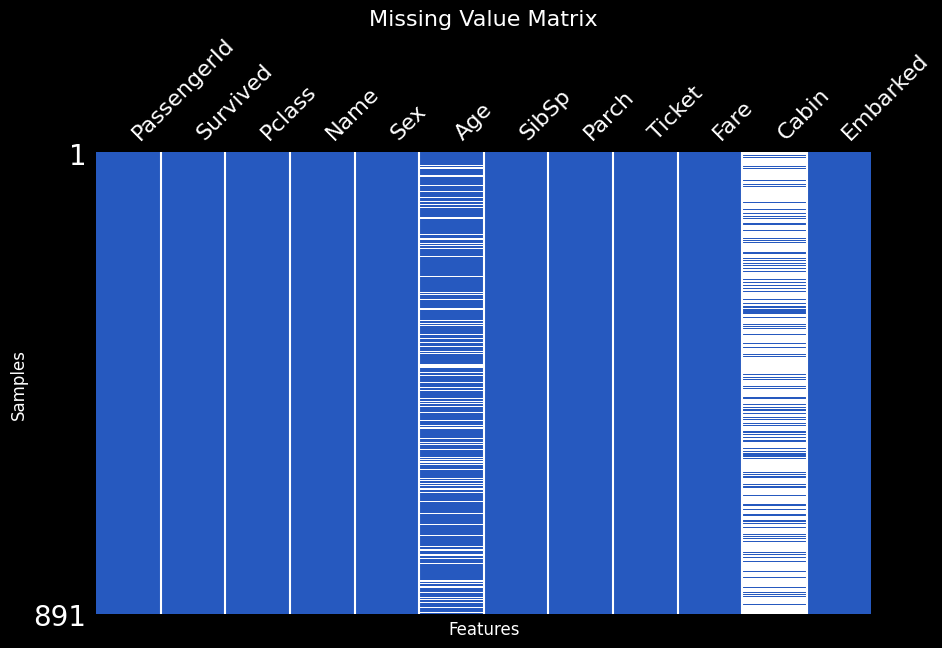

In [33]:
import missingno as msno
import matplotlib.pyplot as plt


# Set a dark background style for the plot
plt.style.use('dark_background')

# Create the missing value matrix plot with blue color
msno.matrix(ds, figsize=(10, 6), sparkline=False, color=(0.15, 0.35, 0.75))

# Customize plot
plt.title('Missing Value Matrix', fontsize=16, color='white')
plt.xlabel('Features', fontsize=12, color='white')
plt.ylabel('Samples', fontsize=12, color='white')

# Show the plot
plt.show()


In [34]:
#Handle the missing values
numerical_columns = ds.select_dtypes(include=['int64', 'float64']).columns
ds[numerical_columns] = ds[numerical_columns].fillna(ds[numerical_columns].mean())

categorical_columns = ds.select_dtypes(include='object').columns
ds[categorical_columns] = ds[categorical_columns].fillna('Unknown')

# Chcek if any missing value is left after handling
print(ds.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [35]:
ds.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


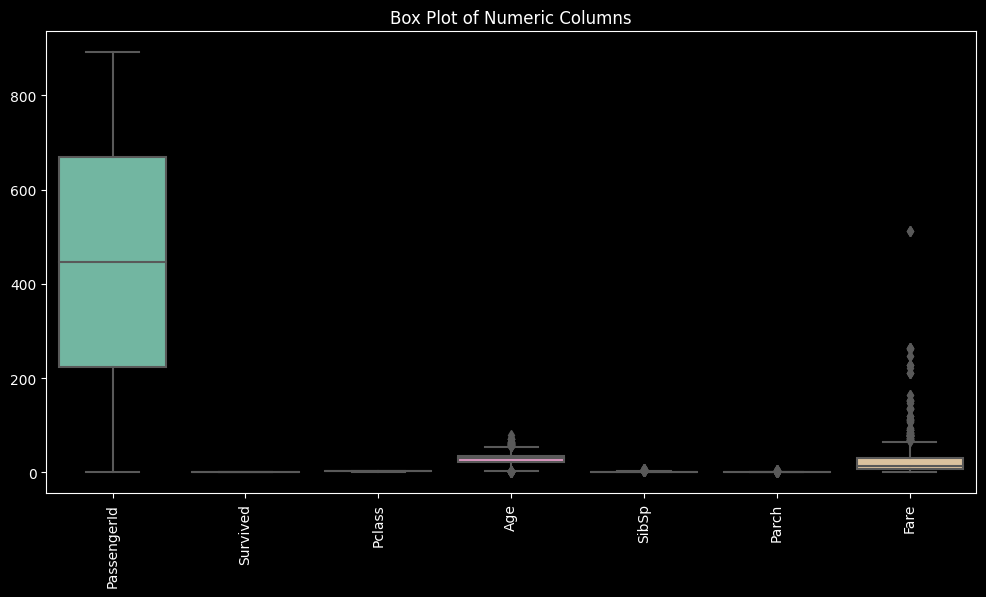

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ds.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient="v", palette="Set2")  # Use "v" for vertical orientation
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


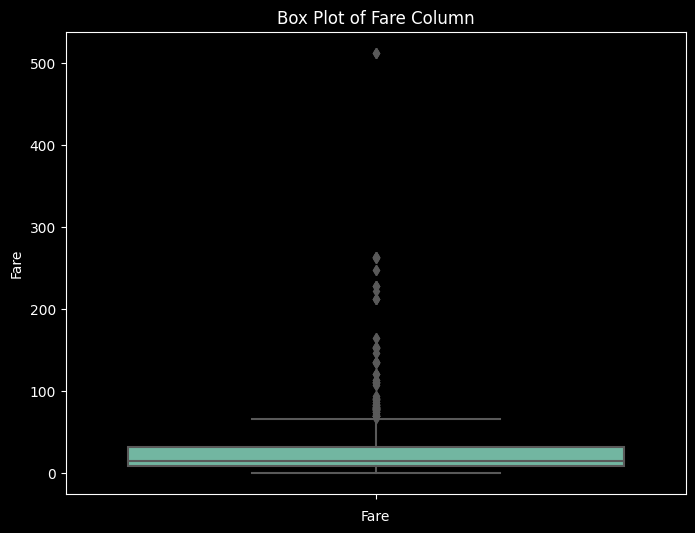

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the "Fare" column with swapped x and y axes
plt.figure(figsize=(8, 6))
sns.boxplot(y=ds["Fare"], orient="h", palette="Set2")  # Horizontal box plot with y-axis as "Fare"
plt.title("Box Plot of Fare Column")
plt.xlabel("Fare")  # Change the x-axis label to "Fare"
plt.show()



In [46]:
import pandas as pd


# Define the column and the IQR multiplier for outlier removal (adjust as needed)
column_name = "Fare"
iqr_multiplier = 1.5  # Adjust the multiplier as needed

# Calculate the IQR (Interquartile Range) for the Fare column
Q1 = ds[column_name].quantile(0.25)
Q3 = ds[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - (iqr_multiplier * IQR)
upper_bound = Q3 + (iqr_multiplier * IQR)

# Remove outliers from the Fare column
ds_no_outliers = ds[(ds[column_name] >= lower_bound) & (ds[column_name] <= upper_bound)]

# Optional: Reset the index of the cleaned dataset
ds_no_outliers.reset_index(drop=True, inplace=True)

# Check the shape of the cleaned dataset
print("Original dataset shape:", ds.shape)
print("Dataset shape after removing outliers from Fare:", ds_no_outliers.shape)


Original dataset shape: (891, 12)
Dataset shape after removing outliers from Fare: (775, 12)


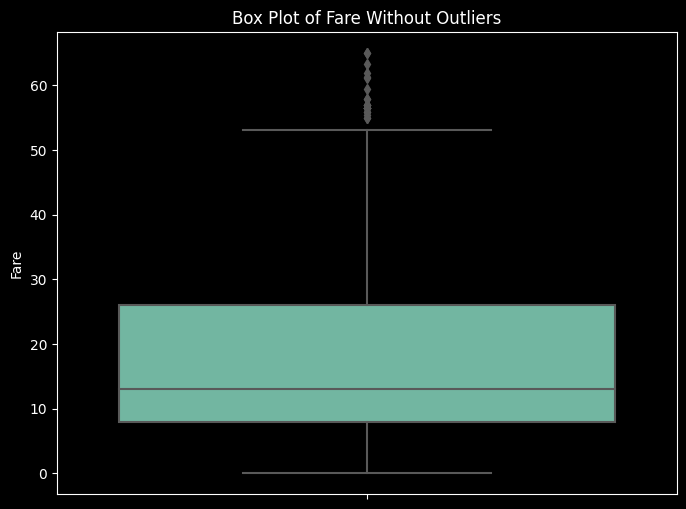

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the column name
column_name = "Fare"

# Calculate the IQR (Interquartile Range) for the Fare column
Q1 = ds[column_name].quantile(0.25)
Q3 = ds[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the dataset to exclude outliers from the Fare column
ds_no_outliers = ds[(ds[column_name] >= lower_bound) & (ds[column_name] <= upper_bound)]

# Create a box plot for Fare without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=ds_no_outliers[column_name], orient="v", palette="Set2")  # Vertical box plot
plt.title(f"Box Plot of {column_name} Without Outliers")
plt.ylabel(column_name)
plt.show()


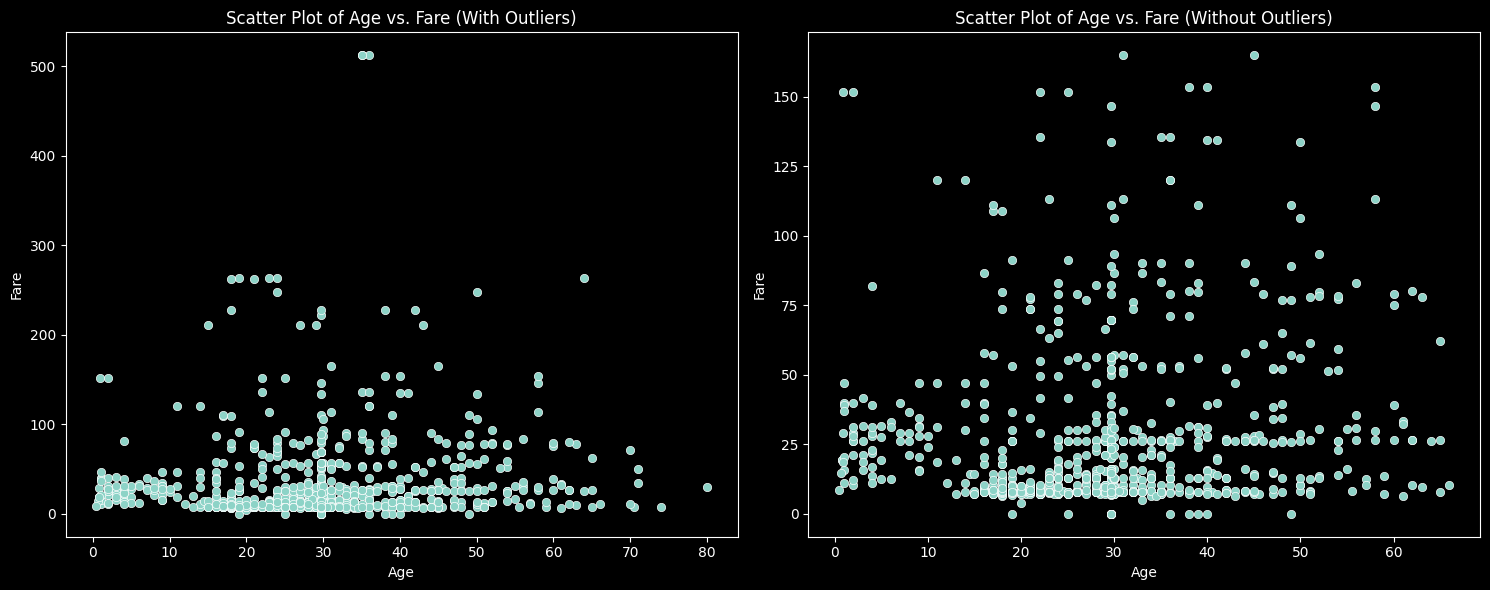

In [40]:

# Create a figure with two subplots (one for each version)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with outliers
sns.scatterplot(x="Age", y="Fare", data=ds, ax=axes[0])
axes[0].set_title("Scatter Plot of Age vs. Fare (With Outliers)")

# Define a z-score threshold for outliers (adjust as needed)
z_score_threshold = 3

# Calculate the z-scores for "Age" and "Fare" columns
z_scores = np.abs((ds[['Age', 'Fare']] - ds[['Age', 'Fare']].mean()) / ds[['Age', 'Fare']].std())

# Remove rows with outliers based on the z-score threshold
ds_no_outliers = ds[(z_scores < z_score_threshold).all(axis=1)]

# Scatter plot without outliers
sns.scatterplot(x="Age", y="Fare", data=ds_no_outliers, ax=axes[1])
axes[1].set_title("Scatter Plot of Age vs. Fare (Without Outliers)")

plt.tight_layout()
plt.show()